# CHURN ANALYSIS

In [283]:
import pandas as pd
import os

DATA_PATH = '../data'
FAKE_FILENAME = 'exchanges_ML.csv'
exchanges_ML = pd.read_csv(os.path.join(DATA_PATH, FAKE_FILENAME))

In [285]:
exchanges_ML.head()


,Unnamed: 0.1,Unnamed: 0,user_id,nb_year,has_renewed,is_new_user,referral,promotion,payment3x,payement2,...,exchanges_host,nb_guests_host,nights_host,capacity_host,diff_capacity_host,finalized_host,book_diff_host,exchange_type_host_clean,home_host_clean,residence_host_clean
0,0,0,1,1,0,0,0,0,0,0,...,32.0,4.0,6.0,8.0,4.0,2.0,56.0,NON_RECIPROCAL,Home,primary
1,1,1,9,2,1,0,0,0,0,0,...,380.0,4.0,5.0,7.0,3.0,8.0,43.0,NON_RECIPROCAL,apartment,primary
2,2,2,10,1,1,1,0,0,0,0,...,53.0,3.0,11.0,12.0,9.0,0.0,121.0,NON_RECIPROCAL,apartment,primary
3,3,3,40,1,1,0,0,0,0,0,...,4.0,3.0,5.0,5.0,2.0,0.0,104.0,NON_RECIPROCAL,Home,primary
4,4,4,67,1,1,1,0,0,0,0,...,53.0,3.0,8.0,6.0,3.0,1.0,144.0,NON_RECIPROCAL,apartment,primary


In [287]:
exchanges_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70726 entries, 0 to 70725
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               70726 non-null  int64  
 1   Unnamed: 0                 70726 non-null  int64  
 2   user_id                    70726 non-null  int64  
 3   nb_year                    70726 non-null  int64  
 4   has_renewed                70726 non-null  int64  
 5   is_new_user                70726 non-null  int64  
 6   referral                   70726 non-null  int64  
 7   promotion                  70726 non-null  int64  
 8   payment3x                  70726 non-null  int64  
 9   payement2                  70726 non-null  int64  
 10  payment3                   70726 non-null  int64  
 11  abscence_days              70726 non-null  int64  
 12  exchanges_guest            70726 non-null  float64
 13  nb_guests_guest            70726 non-null  flo

In [289]:
exchanges_ML.isnull().sum()

Unnamed: 0.1                 0
Unnamed: 0                   0
user_id                      0
nb_year                      0
has_renewed                  0
is_new_user                  0
referral                     0
promotion                    0
payment3x                    0
payement2                    0
payment3                     0
abscence_days                0
exchanges_guest              0
nb_guests_guest              0
nights_guest                 0
capacity_guest               0
diff_capacity_guest          0
finalized_guest              0
book_diff_guest              0
exchange_type_guest_clean    0
home_guest_clean             0
residence_guest_clean        0
exchanges_host               0
nb_guests_host               0
nights_host                  0
capacity_host                0
diff_capacity_host           0
finalized_host               0
book_diff_host               0
exchange_type_host_clean     0
home_host_clean              0
residence_host_clean         0
dtype: i

## PREPROCESSING

In [506]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [292]:
exchanges_ML.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [294]:
exchanges_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70726 entries, 0 to 70725
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    70726 non-null  int64  
 1   nb_year                    70726 non-null  int64  
 2   has_renewed                70726 non-null  int64  
 3   is_new_user                70726 non-null  int64  
 4   referral                   70726 non-null  int64  
 5   promotion                  70726 non-null  int64  
 6   payment3x                  70726 non-null  int64  
 7   payement2                  70726 non-null  int64  
 8   payment3                   70726 non-null  int64  
 9   abscence_days              70726 non-null  int64  
 10  exchanges_guest            70726 non-null  float64
 11  nb_guests_guest            70726 non-null  float64
 12  nights_guest               70726 non-null  float64
 13  capacity_guest             70726 non-null  flo

<Axes: xlabel='has_renewed', ylabel='count'>

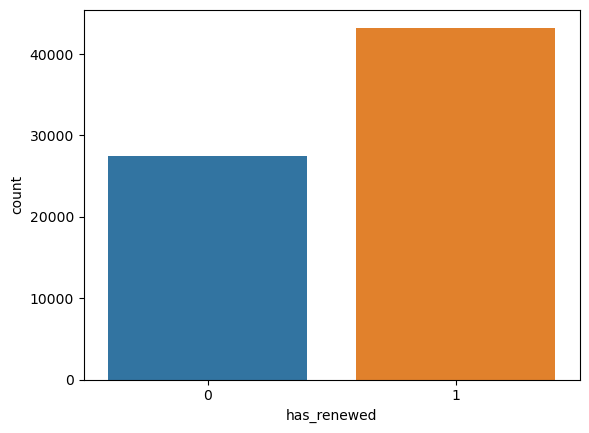

In [323]:
import seaborn as sns 
sns.countplot(exchanges_ML, x = 'has_renewed')

In [325]:
renewed = exchanges_ML[exchanges_ML['has_renewed']==1]
not_renewed = exchanges_ML[exchanges_ML['has_renewed']==0]

In [331]:
renewed = renewed.iloc[:30000,:]

In [335]:
df_all = pd.concat([renewed,not_renewed])

In [337]:
df_all.shape

(57476, 30)

In [341]:
target = 'has_renewed'

In [343]:
features = [
    'nb_year', 'is_new_user', 'referral', 'promotion', 
    'payment3x', 'payement2', 'payment3', 'abscence_days', 'exchanges_guest', 
    'nb_guests_guest', 'nights_guest', 'exchange_type_guest_clean', 'home_guest_clean', 
    'residence_guest_clean', 'capacity_guest', 'diff_capacity_guest', 'finalized_guest', 
    'book_diff_guest', 'exchanges_host', 'nb_guests_host', 'nights_host', 
    'exchange_type_host_clean', 'home_host_clean', 'residence_host_clean', 'capacity_host', 
    'diff_capacity_host', 'finalized_host', 'book_diff_host']

In [345]:
X = exchanges_ML[features]
y = exchanges_ML[target]

In [363]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [365]:
categorical_features

Index(['exchange_type_guest_clean', 'home_guest_clean',
       'residence_guest_clean', 'exchange_type_host_clean', 'home_host_clean',
       'residence_host_clean'],
      dtype='object')

In [367]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [425]:
features = preprocessor.get_feature_names_out()
features

array(['num__nb_year', 'num__is_new_user', 'num__referral',
       'num__promotion', 'num__payment3x', 'num__payement2',
       'num__payment3', 'num__abscence_days', 'num__exchanges_guest',
       'num__nb_guests_guest', 'num__nights_guest', 'num__capacity_guest',
       'num__diff_capacity_guest', 'num__finalized_guest',
       'num__book_diff_guest', 'num__exchanges_host',
       'num__nb_guests_host', 'num__nights_host', 'num__capacity_host',
       'num__diff_capacity_host', 'num__finalized_host',
       'num__book_diff_host',
       'cat__exchange_type_guest_clean_NON_RECIPROCAL',
       'cat__exchange_type_guest_clean_NOT GUEST',
       'cat__exchange_type_guest_clean_RECIPROCAL',
       'cat__exchange_type_guest_clean_RECIPROCAL AND NON RECIPROCAL',
       'cat__home_guest_clean_HOME AND APARTEMENT',
       'cat__home_guest_clean_Home', 'cat__home_guest_clean_NOT GUEST',
       'cat__home_guest_clean_apartment',
       'cat__residence_guest_clean_NOT GUEST',
       'cat__reside

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle =True)


In [371]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [317]:
if y.dtype == 'object':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

In [379]:
y_train

54262    0
51675    0
29880    1
31789    1
55607    1
        ..
37194    1
6265     1
54886    1
860      0
15795    0
Name: has_renewed, Length: 56580, dtype: int64

## TRAINING

In [381]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [383]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [452]:
importances = model.feature_importances_

In [476]:
importances_df = pd.DataFrame(importances)
importances_df.index = features#.rename(columns=features)
impotances_df =importances_df.rename(columns={0:"importances"})
impotances_df.sort_values(by="importances", ascending =False)

,importances
num__exchanges_host,0.094523
num__book_diff_host,0.080744
num__exchanges_guest,0.078088
num__abscence_days,0.074246
num__book_diff_guest,0.072858
num__finalized_host,0.065868
num__finalized_guest,0.058680
num__nights_guest,0.052671
num__nights_host,0.051688
num__nb_year,0.050542


In [480]:
best_features = importances_df.index[:16]

In [500]:
best_features = list(best_features)
best_features  = [i.replace("num__","") for i in best_features]
best_features

['nb_year',
 'is_new_user',
 'referral',
 'promotion',
 'payment3x',
 'payement2',
 'payment3',
 'abscence_days',
 'exchanges_guest',
 'nb_guests_guest',
 'nights_guest',
 'capacity_guest',
 'diff_capacity_guest',
 'finalized_guest',
 'book_diff_guest',
 'exchanges_host']

In [522]:
X = exchanges_ML[best_features]

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle =True)

In [527]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## BASELINE MODEL

#### Logistic Regression

In [531]:
reg =LogisticRegression()
reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [535]:
reg_acc = reg.score(X_test_scaled, y_test)
reg_acc

0.6908666760921816

In [537]:
reg_labels = reg.predict(X_test_scaled)

In [539]:
from sklearn.metrics import classification_report
print(classification_report(y_test,reg_labels))

              precision    recall  f1-score   support

           0       0.63      0.48      0.55      5487
           1       0.72      0.82      0.77      8659

    accuracy                           0.69     14146
   macro avg       0.67      0.65      0.66     14146
weighted avg       0.68      0.69      0.68     14146



#### Support Vector Machine

In [544]:
from sklearn import svm
svm = svm.SVC()

In [546]:
svm.fit(X_train_scaled, y_train)

SVC()

In [548]:
svm_acc = svm.score(X_test_scaled, y_test)
svm_acc

0.707267071963806

In [550]:
svm_labels = svm.predict(X_test_scaled)

In [551]:
print(classification_report(y_test,svm_labels))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58      5487
           1       0.73      0.83      0.78      8659

    accuracy                           0.71     14146
   macro avg       0.69      0.67      0.68     14146
weighted avg       0.70      0.71      0.70     14146



#### KNN

In [554]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=32)

In [556]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=32)

In [558]:
knn_acc = knn.score(X_test_scaled, y_test)
knn_acc

0.694896083698572

In [560]:
knn_labels = knn.predict(X_test_scaled)

In [564]:
print(classification_report(y_test,knn_labels))

              precision    recall  f1-score   support

           0       0.63      0.53      0.57      5487
           1       0.73      0.80      0.76      8659

    accuracy                           0.69     14146
   macro avg       0.68      0.66      0.67     14146
weighted avg       0.69      0.69      0.69     14146



#### Random Forest

In [567]:
rf = RandomForestClassifier()

In [571]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [572]:
rf_acc = rf.score(X_test_scaled, y_test)
rf_acc

0.7054290965643998

In [575]:
rf_labels = rf.predict(X_test_scaled)

In [577]:
print(classification_report(y_test,rf_labels))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59      5487
           1       0.73      0.81      0.77      8659

    accuracy                           0.71     14146
   macro avg       0.69      0.67      0.68     14146
weighted avg       0.70      0.71      0.70     14146



#### Classification avec Pycaret

In [589]:
pip install --upgrade pycaret


Note: you may need to restart the kernel to use updated packages.


In [590]:
from pycaret.classification import *

ImportError: cannot import name '_Scorer' from 'sklearn.metrics._scorer' (/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py)

## EVALUATE THE MODEL

In [219]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5470
           1       1.00      1.00      1.00      8676

    accuracy                           1.00     14146
   macro avg       1.00      1.00      1.00     14146
weighted avg       1.00      1.00      1.00     14146

[[5470    0]
 [   0 8676]]


In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0   5470.0
1                   1.0     1.0       1.0   8676.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  14146.0
weighted avg        1.0     1.0       1.0  14146.0
